### The Sparks Foundation Internship- GRIPSEMP2021

#### Data Science And Business Analytics      

#### Author : KANCHAN ARVIND CHORGE




Task 4 : Exploratory Data Analysis on 'Global Terrorism' dataset


Dataset : https://bit.ly/2TK5Xn5

Objective : To find hot zone of terrorism 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Dataset

In [2]:
import os

In [3]:
data=pd.read_csv(r"C:\Users\Arvind\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv")

C:\Users\Arvind\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
#select only desired columns
new_data=data[['iyear','imonth','iday','gname','country_txt','region_txt','summary',
               'provstate','city','latitude','longitude','attacktype1_txt','target1',
               'targtype1_txt','nkill','weaptype1_txt','motive','nwound']]

In [8]:
new_data.head()

,iyear,imonth,iday,gname,country_txt,region_txt,summary,provstate,city,latitude,longitude,attacktype1_txt,target1,targtype1_txt,nkill,weaptype1_txt,motive,nwound
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,Private Citizens & Property,1.0,Unknown,NaN,0.0
1,1970,0,0,23rd of September Communist League,Mexico,North America,NaN,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),0.0,Unknown,NaN,0.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,NaN,Tarlac,Unknown,15.478598,120.599741,Assassination,Employee,Journalists & Media,1.0,Unknown,NaN,0.0
3,1970,1,0,Unknown,Greece,Western Europe,NaN,Attica,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),NaN,Explosives,NaN,NaN
4,1970,1,0,Unknown,Japan,East Asia,NaN,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),NaN,Incendiary,NaN,NaN


In [9]:
new_data.shape

(181691, 18)

In [10]:
new_data.isnull().sum()

iyear                   0
imonth                  0
iday                    0
gname                   0
country_txt             0
region_txt              0
summary             66129
provstate             421
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
target1               636
targtype1_txt           0
nkill               10313
weaptype1_txt           0
motive             131130
nwound              16311
dtype: int64

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   gname            181691 non-null  object 
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   summary          115562 non-null  object 
 7   provstate        181270 non-null  object 
 8   city             181257 non-null  object 
 9   latitude         177135 non-null  float64
 10  longitude        177134 non-null  float64
 11  attacktype1_txt  181691 non-null  object 
 12  target1          181055 non-null  object 
 13  targtype1_txt    181691 non-null  object 
 14  nkill            171378 non-null  float64
 15  weaptype1_txt    181691 non-null  object 
 16  motive           50561 non-null   obje

In [12]:
#replacing null values with zero
new_data['nwound']=data['nwound'].fillna(0)
new_data['nkill']=data['nkill'].fillna(0)

<ipython-input-12-b5f2c51a9b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['nwound']=data['nwound'].fillna(0)
<ipython-input-12-b5f2c51a9b06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['nkill']=data['nkill'].fillna(0)


In [13]:
new_data.isnull().sum()

iyear                   0
imonth                  0
iday                    0
gname                   0
country_txt             0
region_txt              0
summary             66129
provstate             421
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
target1               636
targtype1_txt           0
nkill                   0
weaptype1_txt           0
motive             131130
nwound                  0
dtype: int64

In [14]:
new_data.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


#### 1. No. of attacks in each year

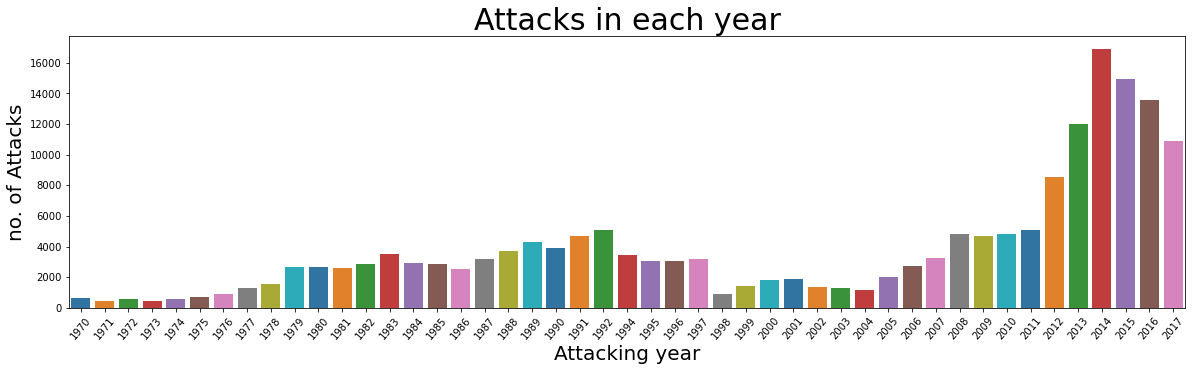

In [15]:
year=new_data['iyear'].unique()
years_count=data['iyear'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(x=year,y=years_count,palette='tab10')
plt.xticks(rotation=50)
plt.xlabel('Attacking year',fontsize=20)
plt.ylabel('no. of Attacks',fontsize=20)
plt.title('Attacks in each year',fontsize=30)
plt.show()


In 2014, maximum attacks takes place. And from 2012, there is signigicant increase in attacks. 

#### 2. Terrorist activities by region in each year

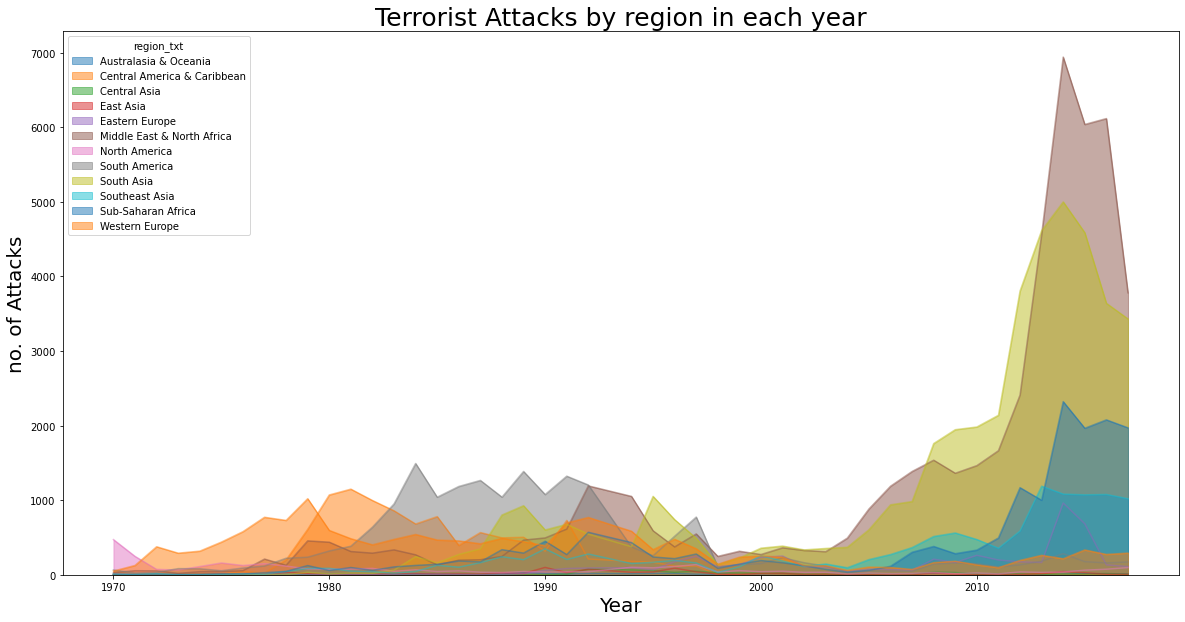

In [16]:
pd.crosstab(new_data.iyear,data.region_txt).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Attacks by region in each year',fontsize=25)
plt.xlabel('Year',fontsize=20)
plt.ylabel('no. of Attacks',fontsize=20)
plt.show()

In middle east & north africa and south asia has more no of attacks.

#### 3. Most affected Country

In [17]:
attack=new_data.country_txt.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

C:\Users\Arvind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


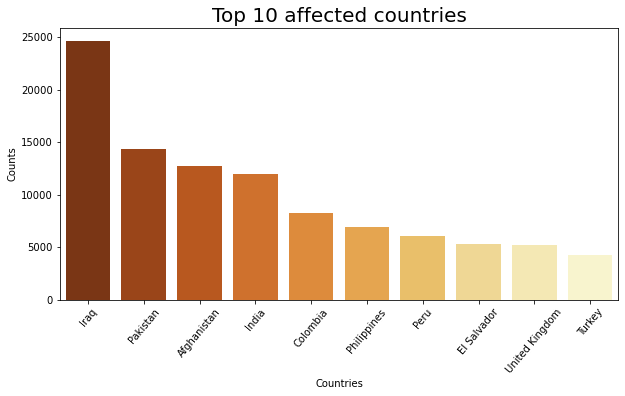

In [18]:
plt.subplots(figsize=(10,5))
sns.barplot(new_data['country_txt'].value_counts()[:10].index,
            new_data['country_txt'].value_counts()[:10].values,palette='YlOrBr_r')
plt.xticks(rotation=50)
plt.xlabel('Countries',fontsize=10)
plt.ylabel('Counts',fontsize=10)
plt.title('Top 10 affected countries',fontsize=20)
plt.show()

In Iraq country has more number of attacks.

#### 4. More attacking group of terrorists

In [19]:
new_data.gname.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: gname, dtype: int64

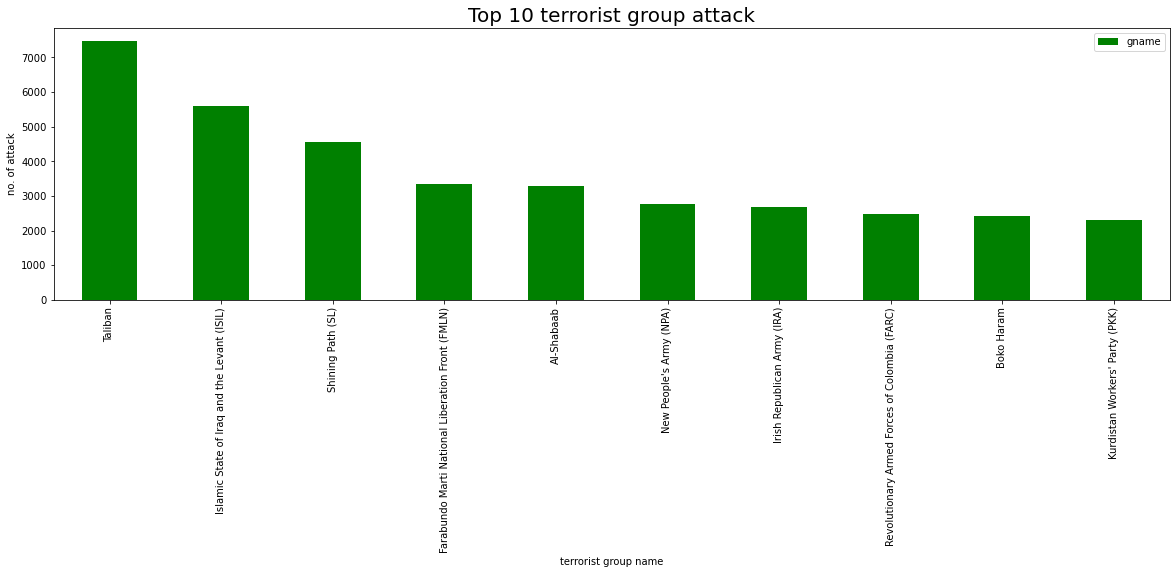

In [20]:
new_data['gname'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,5))
plt.xlabel('terrorist group name',fontsize=10)
plt.ylabel('no. of attack',fontsize=10)
plt.title('Top 10 terrorist group attack',fontsize=20)
plt.show()


Taliban group done more attacks

#### 5. No. of people killed due to attacks

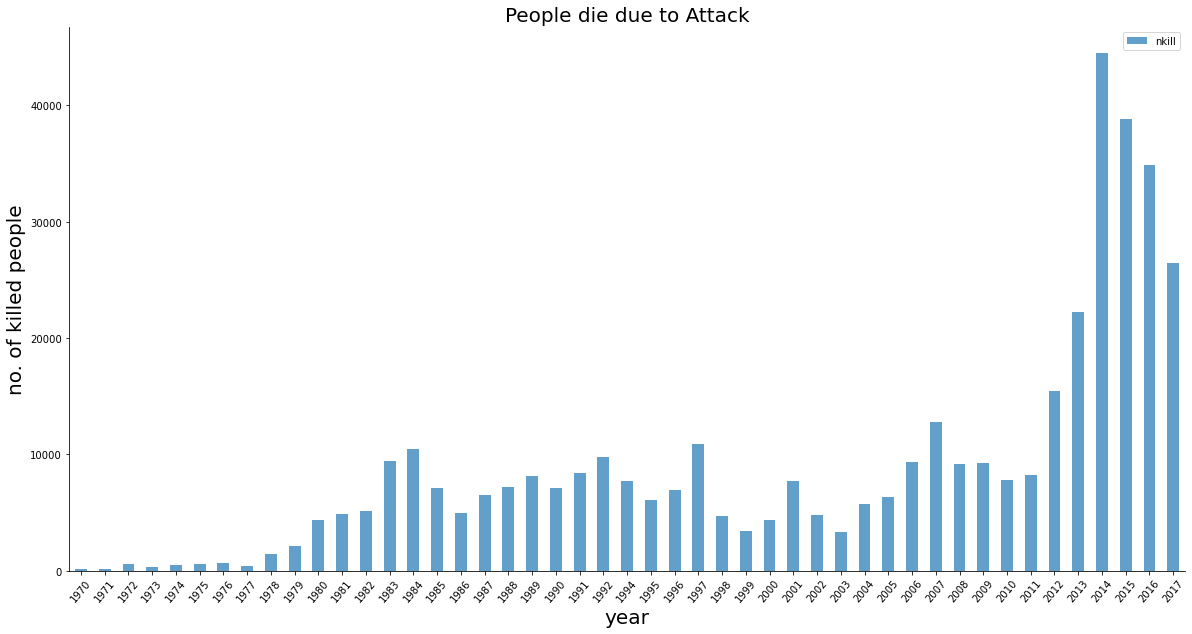

In [21]:
df=new_data[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4=plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=50)
plt.xlabel('year',fontsize=20)
plt.ylabel('no. of killed people',fontsize=20)
plt.title('People die due to Attack',fontsize=20)
top_side=ax4.spines["top"]
top_side.set_visible(False)
right_side=ax4.spines["right"]
right_side.set_visible(False)

 In 2014, more people were killed due to terrorist attack 

#### 6. Number of killed people per City

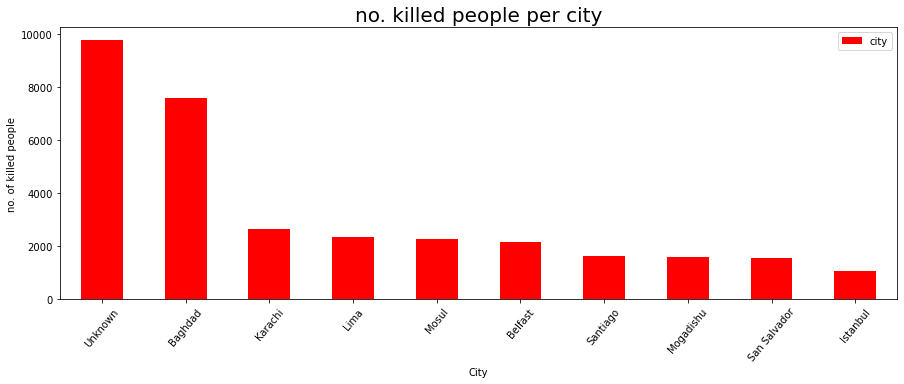

In [22]:
new_data['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(15,5),color='red')
plt.xticks(rotation=50)
plt.xlabel('City',fontsize=10)
plt.ylabel('no. of killed people',fontsize=10)
plt.title('no. killed people per city',fontsize=20)
plt.show()


#### 7. No. of killed people according to attack type 

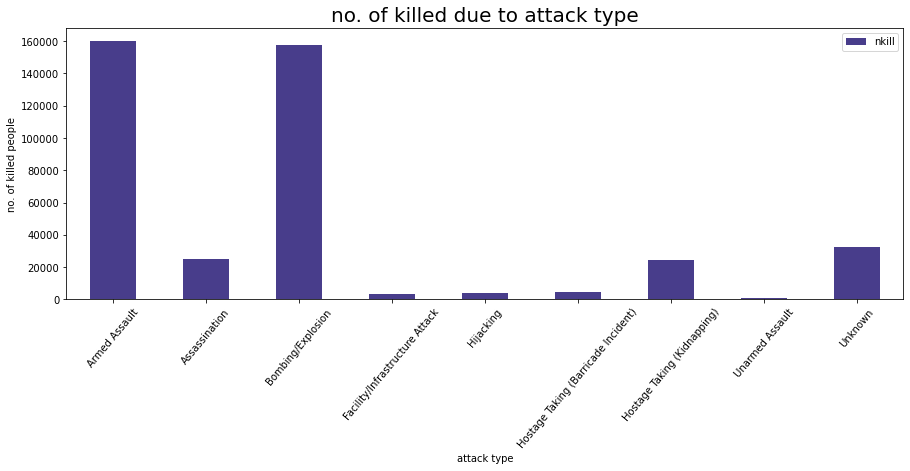

In [23]:
new_data[['attacktype1_txt','nkill']].groupby(["attacktype1_txt"],axis=0).sum().plot(kind='bar',figsize=(15,5),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.xlabel('attack type',fontsize=10)
plt.ylabel('no. of killed people',fontsize=10)
plt.title('no. of killed due to attack type',fontsize=20)
plt.show()


Due to Armed Assault and Bombing/Explosion, many people loss their life.

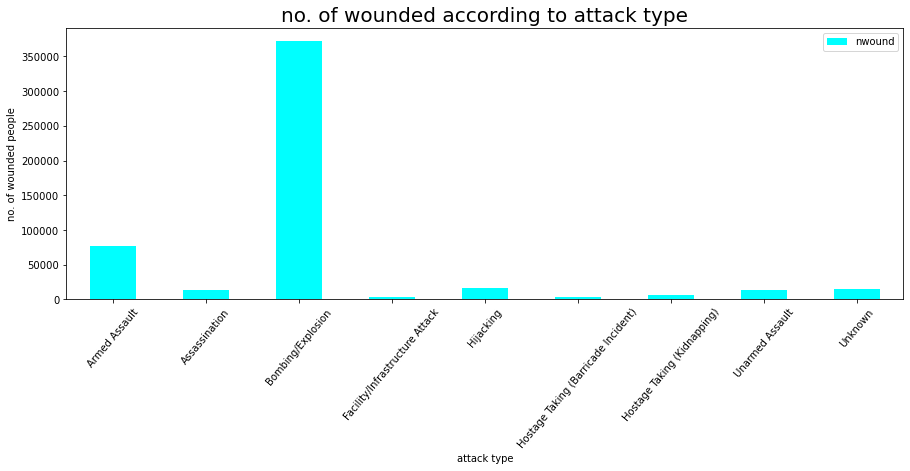

In [24]:
new_data[['attacktype1_txt','nwound']].groupby(["attacktype1_txt"],axis=0).sum().plot(kind='bar',figsize=(15,5),color=['cyan'])
plt.xticks(rotation=50)
plt.xlabel('attack type',fontsize=10)
plt.ylabel('no. of wounded people',fontsize=10)
plt.title('no. of wounded according to attack type',fontsize=20)
plt.show()


More no. of people wounded due to Bombing/Explosion.

#### 9. More targeted community

C:\Users\Arvind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


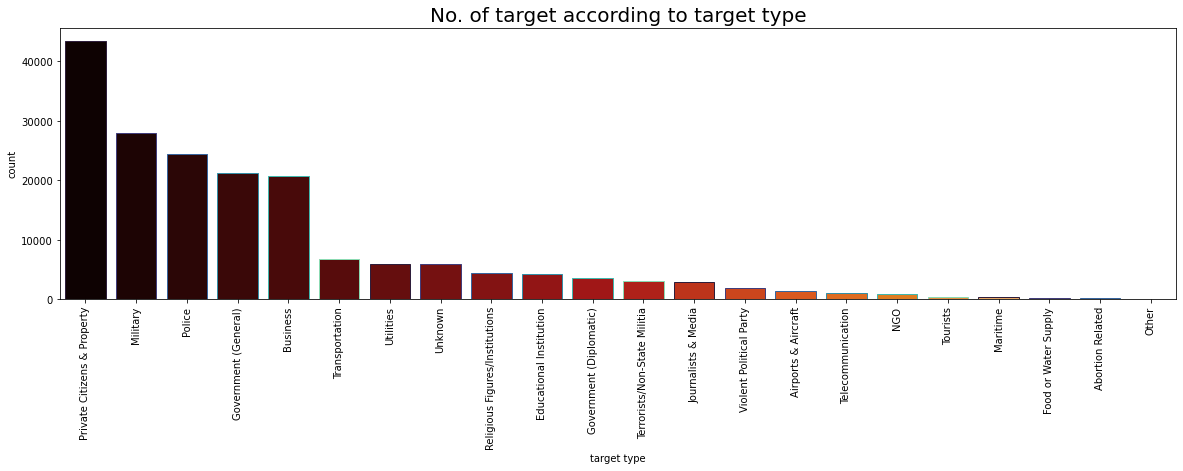

In [25]:
plt.subplots(figsize=(20,5))
sns.countplot(new_data["targtype1_txt"],order=data['targtype1_txt'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel('target type',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.title('No. of target according to target type',fontsize=20)
plt.show()


Most frequently, terrorists targetted to Private Citizens & Property.

#### No. of people killed in particular country due to particular terrorist group

In [26]:
df1=new_data[['gname','country_txt','nkill']]
df1=df1.groupby(['gname','country_txt'],axis=0).sum().sort_values('nkill',ascending=False).drop('Unknown').reset_index().head(10)
df1

C:\Users\Arvind\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,gname,country_txt,nkill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [27]:
kill=new_data.loc[:,'nkill']
print('Number of people killed by terror attack :',int(sum(kill.dropna())))


Number of people killed by terror attack : 411868


#### Conclusion
- Year with the most attack 2014
- Region with the most attack: middle east & north africa 
- Country with the most Attacks: Iraq 
- Group with the most attacks: Taliban
- More killed people in year: 2014
- City with the most attacks: Baghdad
- Most attack type: Bombing/Explosion
- Most targeted group: Private Citizens & Property

#### THANK YOU